# Task 2: Exploring Supervised Machine Learning

Objective of the Task: In this regression task we have to predict the percentage of marks that a student is expected to score based upon the number of hours he/she has studied. Since it comprises of only 2 variables, therefore, it falls under simple linear regression category.

# Importing libraries and the dataset

In [121]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set(style="darkgrid")
import warnings
warnings.filterwarnings("ignore")

In [122]:
#Importing the dataset
url="http://bit.ly/w-data"
data=pd.read_csv(url)
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [123]:
#Checking for missing values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [124]:
#Checking datatypes within the dataset
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [125]:
#Checking the structure of the dataset
data.shape

(25, 2)

# Visualising the dataset

As seen above, the dataset comprises of 25 rows and 2 columns (Hours and Scores). Although tabular format is a good way of analysing data, graphical format is always the best way to understand the dataset and the relations present within them: 

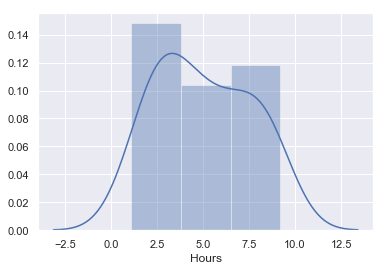

In [126]:
#Frequency distribution of Hours Studied
sns.distplot(data['Hours'])

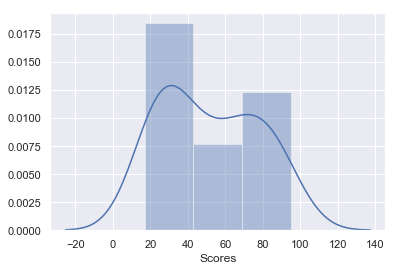

In [127]:
#Frequency distribution of Scores obtained
sns.distplot(data['Scores'])

Both these histograms show the "frequency distributions" of the "Hours studied" by the student and the "Scores obtained" by the student.

Text(0, 0.5, 'Percentage Score')

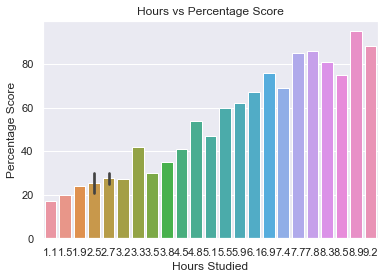

In [128]:
#Visualising the dataset via barplot
sns.barplot(x="Hours",y="Scores",data=data[:50])
plt.title('Hours vs Percentage Score')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')

This barplot compares the Hours Studied with the Percentage score of the student.

Text(0, 0.5, 'Percentage Score')

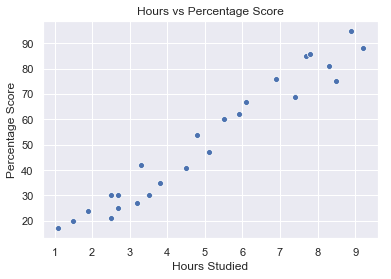

In [129]:
#Visualising the dataset via Scatterplot
sns.scatterplot(x="Hours",y="Scores",data=data[:50])
plt.title('Hours vs Percentage Score')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')

From the scatterplot above, we can easily deduce that the relation between the Hours Studied and the Percentage score is "LINEARLY POSITIVE".

# Preparing the data for linear regression

In [132]:
#The next step is to divide the dataset into "attributes" (i.e. the inputs) and "labels" (i.e. the outputs):
x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [133]:
#Separating features(independent)and target(dependent)variables
x=data.drop(['Scores'],axis=1)
y=data['Scores']

In [134]:
#Importing the train test split function
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=56)

In [135]:
#Implementing Linear Regression
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

In [136]:
#Creating instance for Linear Regression and fitting the model
lr=LR()
lr.fit(x_train,y_train)
print ('Model Successfully Trained')

Model Successfully Trained


# Making predictions and comparisions

In [137]:
#Predicting the scores
y_pred = lr.predict(x_test)
#Testing data - In Hours
print(x_test)

    Hours
16    2.5
19    7.4
22    3.8


In [138]:
#Comparing Actual values vs Predicted values
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
16,30,26.971273
19,69,75.419979
22,35,39.825011


# Main Question: What will be the predicted score if a student studies for 9.25 hrs in a day?

In [139]:
hours = [[9.25]]
score_pred = lr.predict(hours)
print("No of Hours studied by the student = {}".format(hours))
print("Predicted Score of the student = {}".format(score_pred[0]))

No of Hours studied by the student = [[9.25]]
Predicted Score of the student = 93.71183755948113


# Evaluating the model

In order to evaluate the robustness of our model we are using the evaluation metric named "Mean Absolute Error":

In [140]:
#Calculating the mean absolute error
k=mae(test_predict,y_test)
print ('Test Mean Absolute Error is ',k)

Test Mean Absolute Error is  4.757905829693857


# Conclusion of the task

Therefore, we have predicted that if a studied studies for 9.25 hours, he/she will score 93.7118 (using Linear regression). We also found out the Mean absolute error i.e. 4.757.